# Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 

In [1]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
groceries = []

In [3]:
# As the file is in transaction data we will be reading data directly 
with open("C:\\Excelr Data\\Assignments\\Association Rules\\groceries.csv","r") as f:
    groceries = f.read()

In [4]:
groceries

'citrus fruit,semi-finished bread,margarine,ready soups\ntropical fruit,yogurt,coffee\nwhole milk\npip fruit,yogurt,cream cheese ,meat spreads\nother vegetables,whole milk,condensed milk,long life bakery product\nwhole milk,butter,yogurt,rice,abrasive cleaner\nrolls/buns\nother vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)\npot plants\nwhole milk,cereals\ntropical fruit,other vegetables,white bread,bottled water,chocolate\ncitrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes\nbeef\nfrankfurter,rolls/buns,soda\nchicken,tropical fruit\nbutter,sugar,fruit/vegetable juice,newspapers\nfruit/vegetable juice\npackaged fruit/vegetables\nchocolate\nspecialty bar\nother vegetables\nbutter milk,pastry\nwhole milk\ntropical fruit,cream cheese ,processed cheese,detergent,newspapers\ntropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,salty snack,waffles,candy,bathroom cleaner\nbottled water,canned beer\nyogur

In [5]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")
groceries

['citrus fruit,semi-finished bread,margarine,ready soups',
 'tropical fruit,yogurt,coffee',
 'whole milk',
 'pip fruit,yogurt,cream cheese ,meat spreads',
 'other vegetables,whole milk,condensed milk,long life bakery product',
 'whole milk,butter,yogurt,rice,abrasive cleaner',
 'rolls/buns',
 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)',
 'pot plants',
 'whole milk,cereals',
 'tropical fruit,other vegetables,white bread,bottled water,chocolate',
 'citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes',
 'beef',
 'frankfurter,rolls/buns,soda',
 'chicken,tropical fruit',
 'butter,sugar,fruit/vegetable juice,newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk,pastry',
 'whole milk',
 'tropical fruit,cream cheese ,processed cheese,detergent,newspapers',
 'tropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,sal

In [6]:
groceries_list = []

In [7]:
for i in groceries:
    groceries_list.append(i.split(","))

In [8]:
all_groceries_list = []

In [9]:
all_groceries_list = [i for item in groceries_list for i in item]
from collections import Counter

In [10]:
all_groceries_list 

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit',
 'yogurt',
 'coffee',
 'whole milk',
 'pip fruit',
 'yogurt',
 'cream cheese ',
 'meat spreads',
 'other vegetables',
 'whole milk',
 'condensed milk',
 'long life bakery product',
 'whole milk',
 'butter',
 'yogurt',
 'rice',
 'abrasive cleaner',
 'rolls/buns',
 'other vegetables',
 'UHT-milk',
 'rolls/buns',
 'bottled beer',
 'liquor (appetizer)',
 'pot plants',
 'whole milk',
 'cereals',
 'tropical fruit',
 'other vegetables',
 'white bread',
 'bottled water',
 'chocolate',
 'citrus fruit',
 'tropical fruit',
 'whole milk',
 'butter',
 'curd',
 'yogurt',
 'flour',
 'bottled water',
 'dishes',
 'beef',
 'frankfurter',
 'rolls/buns',
 'soda',
 'chicken',
 'tropical fruit',
 'butter',
 'sugar',
 'fruit/vegetable juice',
 'newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk',
 'pastry',
 'whole milk',
 'tropical fru

In [11]:
item_frequencies = Counter(all_groceries_list)
item_frequencies 

Counter({'citrus fruit': 814,
         'semi-finished bread': 174,
         'margarine': 576,
         'ready soups': 18,
         'tropical fruit': 1032,
         'yogurt': 1372,
         'coffee': 571,
         'whole milk': 2513,
         'pip fruit': 744,
         'cream cheese ': 390,
         'meat spreads': 42,
         'other vegetables': 1903,
         'condensed milk': 101,
         'long life bakery product': 368,
         'butter': 545,
         'rice': 75,
         'abrasive cleaner': 35,
         'rolls/buns': 1809,
         'UHT-milk': 329,
         'bottled beer': 792,
         'liquor (appetizer)': 78,
         'pot plants': 170,
         'cereals': 56,
         'white bread': 414,
         'bottled water': 1087,
         'chocolate': 488,
         'curd': 524,
         'flour': 171,
         'dishes': 173,
         'beef': 516,
         'frankfurter': 580,
         'soda': 1715,
         'chicken': 422,
         'sugar': 333,
         'fruit/vegetable juice': 711,
   

In [12]:
# after sorting
#item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1]) #lambda x:x[1] means start with first index
item_frequencies

[('baby food', 1),
 ('sound storage medium', 1),
 ('', 1),
 ('preservation products', 2),
 ('bags', 4),
 ('kitchen utensil', 4),
 ('baby cosmetics', 6),
 ('frozen chicken', 6),
 ('toilet cleaner', 7),
 ('make up remover', 8),
 ('salad dressing', 8),
 ('whisky', 8),
 ('liqueur', 9),
 ('rubbing alcohol', 10),
 ('hair spray', 11),
 ('frozen fruits', 12),
 ('cream', 13),
 ('honey', 15),
 ('decalcifier', 15),
 ('organic products', 16),
 ('specialty vegetables', 17),
 ('ready soups', 18),
 ('flower soil/fertilizer', 19),
 ('prosecco', 20),
 ('cocoa drinks', 22),
 ('organic sausage', 22),
 ('pudding powder', 23),
 ('tidbits', 23),
 ('cooking chocolate', 25),
 ('soap', 26),
 ('bathroom cleaner', 27),
 ('cookware', 27),
 ('potato products', 28),
 ('fish', 29),
 ('snack products', 30),
 ('nut snack', 31),
 ('artif. sweetener', 32),
 ('canned fruit', 32),
 ('syrup', 32),
 ('nuts/prunes', 33),
 ('abrasive cleaner', 35),
 ('skin care', 35),
 ('specialty fat', 36),
 ('tea', 38),
 ('brandy', 41),
 ('

In [13]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
frequencies

[2513,
 1903,
 1809,
 1715,
 1372,
 1087,
 1072,
 1032,
 969,
 924,
 875,
 814,
 792,
 785,
 764,
 744,
 711,
 705,
 638,
 624,
 580,
 576,
 571,
 567,
 545,
 524,
 516,
 515,
 488,
 473,
 422,
 414,
 390,
 378,
 372,
 368,
 365,
 333,
 329,
 327,
 327,
 324,
 305,
 299,
 294,
 279,
 279,
 276,
 275,
 269,
 256,
 256,
 254,
 246,
 241,
 241,
 229,
 220,
 207,
 189,
 189,
 187,
 176,
 174,
 174,
 173,
 171,
 170,
 168,
 163,
 160,
 148,
 148,
 140,
 130,
 128,
 118,
 115,
 112,
 110,
 109,
 106,
 106,
 106,
 103,
 102,
 101,
 101,
 93,
 91,
 90,
 89,
 89,
 88,
 84,
 84,
 83,
 82,
 80,
 79,
 78,
 75,
 73,
 71,
 68,
 67,
 64,
 64,
 60,
 59,
 57,
 56,
 55,
 54,
 54,
 53,
 51,
 50,
 50,
 50,
 45,
 44,
 42,
 42,
 41,
 41,
 38,
 36,
 35,
 35,
 33,
 32,
 32,
 32,
 31,
 30,
 29,
 28,
 27,
 27,
 26,
 25,
 23,
 23,
 22,
 22,
 20,
 19,
 18,
 17,
 16,
 15,
 15,
 13,
 12,
 11,
 10,
 9,
 8,
 8,
 8,
 7,
 6,
 6,
 4,
 4,
 2,
 1,
 1,
 1]

In [14]:
items = list(reversed([i[0] for i in item_frequencies]))
items

['whole milk',
 'other vegetables',
 'rolls/buns',
 'soda',
 'yogurt',
 'bottled water',
 'root vegetables',
 'tropical fruit',
 'shopping bags',
 'sausage',
 'pastry',
 'citrus fruit',
 'bottled beer',
 'newspapers',
 'canned beer',
 'pip fruit',
 'fruit/vegetable juice',
 'whipped/sour cream',
 'brown bread',
 'domestic eggs',
 'frankfurter',
 'margarine',
 'coffee',
 'pork',
 'butter',
 'curd',
 'beef',
 'napkins',
 'chocolate',
 'frozen vegetables',
 'chicken',
 'white bread',
 'cream cheese ',
 'waffles',
 'salty snack',
 'long life bakery product',
 'dessert',
 'sugar',
 'UHT-milk',
 'berries',
 'hamburger meat',
 'hygiene articles',
 'onions',
 'specialty chocolate',
 'candy',
 'frozen meals',
 'misc. beverages',
 'oil',
 'butter milk',
 'specialty bar',
 'ham',
 'beverages',
 'meat',
 'ice cream',
 'sliced cheese',
 'hard cheese',
 'cat food',
 'grapes',
 'chewing gum',
 'red/blush wine',
 'detergent',
 'white wine',
 'pickled vegetables',
 'baking powder',
 'semi-finished brea

Text(0, 0.5, 'Count')

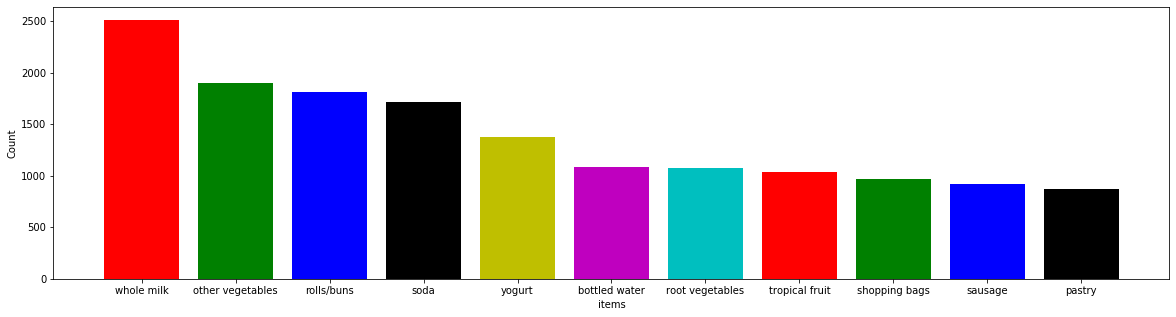

In [15]:
# barplot of top 10 

import matplotlib.pyplot as plt
plt.figure(figsize=(20,5));

plt.bar(height = frequencies[0:11],x = list(range(0,11)),color='rgbkymc');plt.xticks(list(range(0,11),),items[0:11]);plt.xlabel("items")
plt.ylabel("Count")


In [16]:
# Creating Data Frame for the transactions data 
import pandas as pd

In [17]:
# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 
groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series

,0
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."
9834,"[chicken, tropical fruit, other vegetables, vi..."


In [18]:
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction
groceries_series

,0
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [19]:
groceries_series.columns = ["transactions"]

In [20]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')
X

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True) # build the model
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
984,0.010473,"(whole milk, soda, yogurt)"
985,0.007931,"(whole milk, whipped/sour cream, tropical fruit)"
986,0.006202,"(whipped/sour cream, tropical fruit, yogurt)"
987,0.015150,"(whole milk, tropical fruit, yogurt)"


In [22]:
frequent_itemsets.shape

(989, 2)

In [23]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

Text(0, 0.5, 'support')

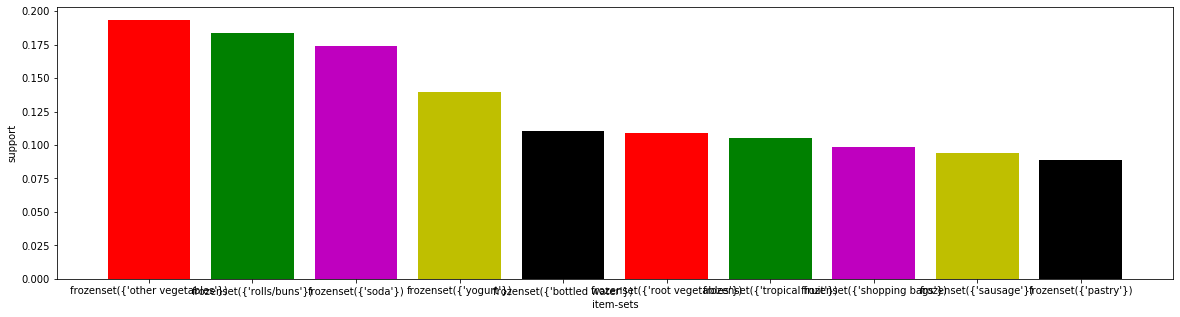

In [24]:
plt.figure(figsize=(20,5));
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')


In [25]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
...,...,...,...,...,...,...,...,...,...
2695,(coffee),(frankfurter),0.058058,0.058973,0.005084,0.087566,1.484842,0.001660,1.031337
2696,(cream cheese ),(curd),0.039654,0.053279,0.005084,0.128205,2.406293,0.002971,1.085945
2697,(curd),(cream cheese ),0.053279,0.039654,0.005084,0.095420,2.406293,0.002971,1.061648
2698,(canned fish),(other vegetables),0.015048,0.193493,0.005084,0.337838,1.745998,0.002172,1.217991


In [26]:
rules.shape

(2700, 9)

In [27]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
6,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
7,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
8,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
9,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941


In [28]:
rules.sort_values('lift',ascending = False,inplace=True)

## To eliminate Redudancy in Rules #################################### 


In [29]:
def to_list(i):
    return (sorted(list(i)))

In [30]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_X

2559                                [ham, white bread]
2558                                [white bread, ham]
2022    [whipped/sour cream, butter, other vegetables]
2019    [butter, other vegetables, whipped/sour cream]
1313                          [root vegetables, herbs]
                             ...                      
467                     [bottled water, shopping bags]
275                            [rolls/buns, pip fruit]
274                            [pip fruit, rolls/buns]
2176                 [specialty chocolate, rolls/buns]
2177                 [rolls/buns, specialty chocolate]
Length: 2700, dtype: object

In [31]:
ma_X = ma_X.apply(sorted)
ma_X

2559                                [ham, white bread]
2558                                [ham, white bread]
2022    [butter, other vegetables, whipped/sour cream]
2019    [butter, other vegetables, whipped/sour cream]
1313                          [herbs, root vegetables]
                             ...                      
467                     [bottled water, shopping bags]
275                            [pip fruit, rolls/buns]
274                            [pip fruit, rolls/buns]
2176                 [rolls/buns, specialty chocolate]
2177                 [rolls/buns, specialty chocolate]
Length: 2700, dtype: object

In [32]:
rules_sets = list(ma_X)
rules_sets

[['ham', 'white bread'],
 ['ham', 'white bread'],
 ['butter', 'other vegetables', 'whipped/sour cream'],
 ['butter', 'other vegetables', 'whipped/sour cream'],
 ['herbs', 'root vegetables'],
 ['herbs', 'root vegetables'],
 ['onions', 'other vegetables', 'root vegetables'],
 ['onions', 'other vegetables', 'root vegetables'],
 ['citrus fruit', 'pip fruit', 'tropical fruit'],
 ['citrus fruit', 'pip fruit', 'tropical fruit'],
 ['berries', 'whipped/sour cream'],
 ['berries', 'whipped/sour cream'],
 ['butter', 'whipped/sour cream', 'whole milk'],
 ['butter', 'whipped/sour cream', 'whole milk'],
 ['citrus fruit', 'pip fruit', 'tropical fruit'],
 ['citrus fruit', 'pip fruit', 'tropical fruit'],
 ['curd', 'tropical fruit', 'yogurt'],
 ['curd', 'tropical fruit', 'yogurt'],
 ['beef', 'other vegetables', 'root vegetables'],
 ['beef', 'other vegetables', 'root vegetables'],
 ['onions', 'other vegetables', 'root vegetables'],
 ['onions', 'other vegetables', 'root vegetables'],
 ['butter', 'other veg

In [33]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
unique_rules_sets

[['pip fruit', 'whole milk', 'yogurt'],
 ['frankfurter', 'margarine'],
 ['citrus fruit', 'hygiene articles'],
 ['bottled beer', 'other vegetables', 'whole milk'],
 ['bottled beer', 'other vegetables'],
 ['other vegetables', 'pastry', 'tropical fruit'],
 ['hamburger meat', 'rolls/buns'],
 ['long life bakery product', 'yogurt'],
 ['pastry', 'rolls/buns', 'whole milk'],
 ['dessert', 'other vegetables'],
 ['dessert', 'shopping bags'],
 ['hamburger meat', 'sausage'],
 ['butter', 'domestic eggs', 'whole milk'],
 ['beef', 'root vegetables'],
 ['frozen vegetables', 'other vegetables', 'whole milk'],
 ['chocolate', 'pip fruit'],
 ['bottled water', 'domestic eggs'],
 ['ham', 'yogurt'],
 ['napkins', 'tropical fruit'],
 ['brown bread', 'margarine'],
 ['napkins', 'yogurt'],
 ['chicken', 'citrus fruit'],
 ['newspapers', 'pip fruit'],
 ['napkins', 'other vegetables'],
 ['hard cheese', 'rolls/buns'],
 ['onions', 'whipped/sour cream'],
 ['domestic eggs', 'soda', 'whole milk'],
 ['berries', 'tropical fr

In [34]:
index_rules = []

In [35]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [36]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [37]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2559,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2022,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
1313,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
2040,"(root vegetables, other vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2207,(tropical fruit),"(pip fruit, citrus fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688
776,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
1469,"(whole milk, whipped/sour cream)",(butter),0.032232,0.055414,0.006711,0.208202,3.757185,0.004925,1.192963
2432,"(tropical fruit, curd)",(yogurt),0.010269,0.139502,0.005287,0.514851,3.690645,0.003855,1.773680
1039,"(beef, other vegetables)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123
1871,"(whole milk, domestic eggs)",(butter),0.029995,0.055414,0.005999,0.200000,3.609174,0.004337,1.180732


In [38]:
## 3D plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
support = rules_no_redudancy["support"]
confidence = rules_no_redudancy["confidence"]
lift = rules_no_redudancy["lift"]

Text(0.5, 0, 'lift')

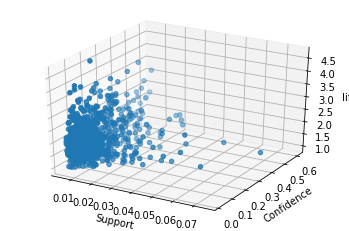

In [40]:
fig = plt.figure()
ax= fig.add_subplot(111, projection = '3d')
ax.scatter(support,confidence,lift)
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("lift")

Text(0, 0.5, 'confidence')

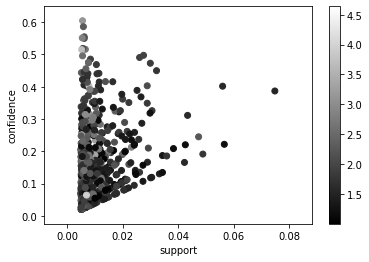

In [41]:
## Scatter plot
import scipy as sp
plt.scatter(x=support, y=confidence, c=lift , cmap = 'gray')
plt.colorbar()
plt.xlabel("support")
plt.ylabel("confidence")

#### Changing the support value to 0.007


In [42]:
frequent_itemsets = apriori(X, min_support=0.007, max_len=4,use_colnames = True) # build the model
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
589,0.015150,"(whole milk, tropical fruit, yogurt)"
590,0.010880,"(whole milk, whipped/sour cream, yogurt)"
591,0.007016,"(whole milk, tropical fruit, root vegetables, ..."
592,0.007829,"(whole milk, root vegetables, yogurt, other ve..."


In [44]:
#Most frequent items based on the support, decending order
frequent_itemsets.sort_values('support',ascending = False,inplace=True)


In [45]:
##Building rules
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
...,...,...,...,...,...,...,...,...,...
1385,"(pork, other vegetables)",(root vegetables),0.021657,0.108998,0.007016,0.323944,2.972002,0.004655,1.317940
1386,"(root vegetables, other vegetables)",(pork),0.047382,0.057651,0.007016,0.148069,2.568352,0.004284,1.106132
1387,(pork),"(root vegetables, other vegetables)",0.057651,0.047382,0.007016,0.121693,2.568352,0.004284,1.084607
1388,(root vegetables),"(pork, other vegetables)",0.108998,0.021657,0.007016,0.064366,2.972002,0.004655,1.045646


In [46]:
##Rules2 are the rules which are generated with the minimum threshold as 1
rules1.sort_values('lift',ascending = False , inplace = True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1349,"(tropical fruit, root vegetables)","(whole milk, other vegetables)",0.021047,0.074835,0.007016,0.333333,4.454257,0.005441,1.387748
1348,"(whole milk, other vegetables)","(tropical fruit, root vegetables)",0.074835,0.021047,0.007016,0.093750,4.454257,0.005441,1.080224
1156,"(whole milk, tropical fruit)","(yogurt, other vegetables)",0.042298,0.043416,0.007626,0.180288,4.152546,0.005789,1.166976
1161,"(yogurt, other vegetables)","(whole milk, tropical fruit)",0.043416,0.042298,0.007626,0.175644,4.152546,0.005789,1.161758
1080,"(whole milk, other vegetables)","(root vegetables, yogurt)",0.074835,0.025826,0.007829,0.104620,4.050919,0.005896,1.088000
...,...,...,...,...,...,...,...,...,...
316,(pip fruit),(soda),0.075648,0.174377,0.013320,0.176075,1.009738,0.000128,1.002061
464,(shopping bags),(bottled water),0.098526,0.110524,0.010981,0.111455,1.008428,0.000092,1.001048
465,(bottled water),(shopping bags),0.110524,0.098526,0.010981,0.099356,1.008428,0.000092,1.000922
274,(pip fruit),(rolls/buns),0.075648,0.183935,0.013930,0.184140,1.001114,0.000015,1.000251
